In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

Cette base de données contient plusieurs informations sur 150 patients. Le nombre de patients étant assez bas, il sera difficile à nos modèles d’apprendre correctement, il va donc falloir utiliser des modèles très optimisés, et très sophistiqués pour atteindre de bonnes performances.
Pour chaque patient, la base de données nous fournit les informations suivantes : le sexe, l’âge, le niveau d’éducation qui est modélisé par le calcul d’un score, le niveau sociologique qui est également modélisé par un score,
le MMSE (c’est un score qui est calculé à partir d’un test cognitif effectué sur les patients, plus le score est bas, plus le risque d’avoir une anomalie cognitive est grand), le CDR (Coefficient de Diffusion Apparente : il se réfère généralement à la mesure des propriétés de diffusion des molécules d’eau dans les tissus biologiques. En neuroimagerie, le CDR peut être utilisé pour évaluer les altérations dans les tissus cérébraux.), eTIV (Estimated Total Intracranial Volume) fait référence à la mesure estimée du volume intracrânien total. Il s’agit du volume total de l’espace à l’intérieur du crâne, qui englobe le cerveau, les liquides cérébrospinaux et autres structures intracrânienne), nWBV (normalized Whole Brain Volume : il se réfère au volume cérébral total normalisé. Il est utilisé pour quantifier la proportion du volume total du cerveau par rapport à la taille total de la boîte crânienne), ASF (Atlas Scaling Factor : c’est un procédé qui permet une mise à l’échelle de l’image par rapport à la taille du cerveau de chaque individu).


In [ ]:
data= pd.read_csv("Desktop/OASIS_longitudinal.csv")

In [ ]:
data

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,1,0,1,75,12,3.0,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,0,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,1,0,1,71,16,2.0,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0182,1,0,1,73,12,3.0,23.0,0.5,1661,0.698,1.056
146,OAS2_0183,0,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
147,OAS2_0184,1,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
148,OAS2_0185,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [ ]:
data.shape

(150, 12)

In [ ]:
data= data[data["Visit"]==1]

In [ ]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [ ]:
data= data.reset_index(drop= True)

In [ ]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [ ]:
data.shape

(150, 15)

In [ ]:
data["Group"].value_counts()

Nondemented    72
Demented       64
Converted      14
Name: Group, dtype: int64

In [ ]:
data['M/F'].value_counts()

F    88
M    62
Name: M/F, dtype: int64

In [ ]:
data['M/F']= data['M/F'].replace(['F', 'M'], [0,1])
data['Group']= data['Group'].replace(['Converted'], ['Demented'])
data['Group']= data['Group'].replace(['Demented', 'Nondemented'], [1,0])
data = data.drop(['MRI ID', 'Visit', 'Hand'], axis=1)

In [ ]:
data.head()

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,0,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,1,0,1,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [ ]:
def make_bar(feature):

    Demented= data[data['Group']==1][feature].value_counts()
    Nondemented= data[data['Group']==0][feature].value_counts()
    df_bar= pd.DataFrame([Demented, Nondemented])
    df_bar.index= ['Demented', 'Nondemented']
    df_bar.plot(kind='bar', stacked=True, figsize=(8,5))


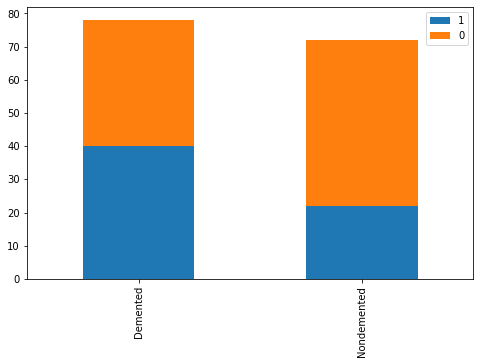

In [ ]:
make_bar('M/F')

(15.3, 35.0)

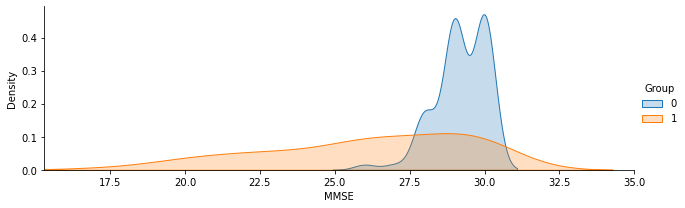

In [ ]:
facet= sns.FacetGrid(data, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'MMSE', shade= True)
facet.set(xlim=(0, data["MMSE"].max()))
facet.add_legend()
plt.xlim(15.30,35) #Grande diff

(0.5, 2.0)

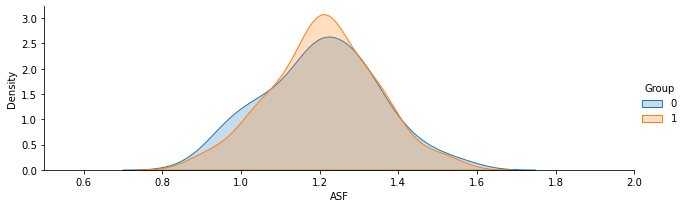

In [ ]:
facet= sns.FacetGrid(data, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'ASF', shade= True)
facet.set(xlim=(0, data["ASF"].max()))
facet.add_legend()
plt.xlim(0.5,2)

(900.0, 2200.0)

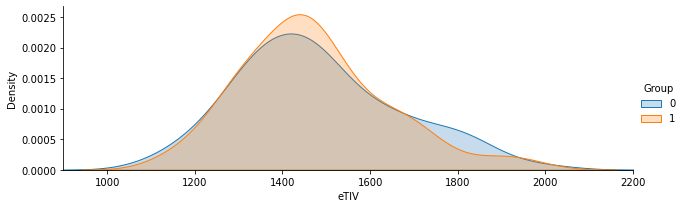

In [ ]:
facet= sns.FacetGrid(data, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'eTIV', shade= True)
facet.set(xlim=(0, data["eTIV"].max()))
facet.add_legend()
plt.xlim(900,2200)

(0.5, 1.0)

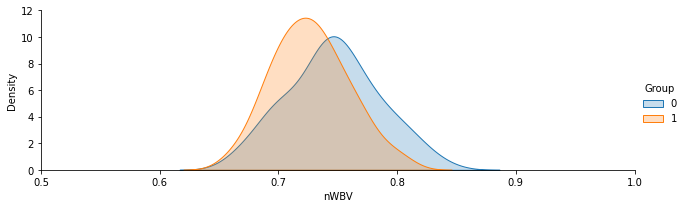

In [ ]:
facet= sns.FacetGrid(data, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'nWBV', shade= True)
facet.set(xlim=(0, data["nWBV"].max()))
facet.add_legend()
plt.xlim(0.5,1)

(50.0, 110.0)

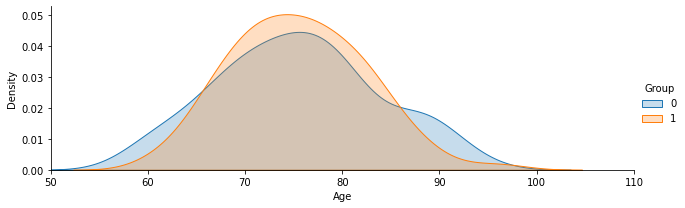

In [ ]:
facet= sns.FacetGrid(data, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, data["Age"].max()))
facet.add_legend()
plt.xlim(50,110)

(1.0, 30.0)

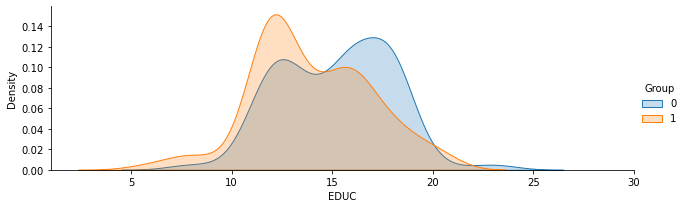

In [ ]:
facet= sns.FacetGrid(data, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'EDUC', shade= True)
facet.set(xlim=(0, data["EDUC"].max()))
facet.add_legend()
plt.xlim(1,30)

In [ ]:
pd.isnull(data).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
data_dropna = data.dropna(axis=0, how='any') #on enleve les valeurs manquantes

In [ ]:
data_SES= data.groupby(['EDUC'])['SES'].median()

In [ ]:
data_SES #le niveau d'éducation n'a pas un réel impact sur le niveau social (SES)

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [ ]:
data['SES'].fillna(data.groupby("EDUC")['SES'].transform("median"), inplace= True)

In [ ]:
y= data['Group'].values #la méthode values permet de transformer le dataframe en array
                        #pour appliquer des modèles

In [ ]:
y

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
X = data[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [ ]:
X_train.head()

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
61,0,73,8,5.0,25.0,1151,0.743,1.525
92,0,76,12,3.0,27.0,1315,0.698,1.335
112,0,73,16,2.0,29.0,1123,0.786,1.563
2,0,88,18,3.0,28.0,1215,0.710,1.444
141,1,68,14,3.0,26.0,1444,0.778,1.216


In [ ]:
# Feature scaling
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(112, 8)

## Régression logistique régularisée

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

L'accuracy du train set est de 0.7589285714285714
L'accuracy du test set est de 0.7631578947368421
Le meilleur paramètre de régularisation est 10
La sensibilité du test (taux de vrais positifs parmi tous les positifs est de 0.7
L'AUC est de 0.8333333333333335


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

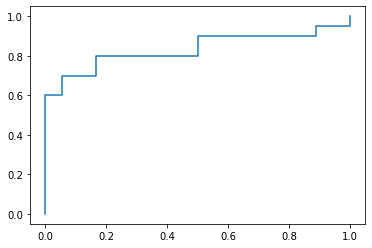

In [ ]:
best_score= 0
k_folds=5

for c in [0.001, 0.1, 1, 10, 100]:

    logRegModel= LogisticRegression(C=c)
    scores= cross_val_score(logRegModel, X_train, y_train, cv=k_folds, scoring= 'accuracy')
    score= np.mean(scores)

    if score > best_score:

        best_score= score
        best_parameter= c

Selected_Log_reg= LogisticRegression(C= best_parameter)
Selected_Log_reg.fit(X_train_scaled, y_train)
test_score= Selected_Log_reg.score(X_test_scaled, y_test)
Predicted_Output_test= Selected_Log_reg.predict(X_test_scaled)
test_recall= recall_score(y_test, Predicted_Output_test, pos_label=1)
Predicted_prob_test= Selected_Log_reg.predict_proba(X_test_scaled)
fpr, tpr, thresholds= roc_curve(y_test, Predicted_prob_test[:,1])
test_auc= auc(fpr, tpr)


print("L'accuracy du train set est de", Selected_Log_reg.score(X_train_scaled, y_train))
print("L'accuracy du test set est de", test_score)
print("Le meilleur paramètre de régularisation est", best_parameter)
print("La sensibilité du test (taux de vrais positifs parmi tous les positifs est de", test_recall)
print("L'AUC est de", test_auc)
plt.plot(fpr, tpr)

## SVM (Support Vector Machine)

In [ ]:
best_score= 0
k_folds=5

for c_parameter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for gamma_parameter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        for kernel_parameter in ['rbf', 'linear', 'poly', 'sigmoid']:
            svmModel= SVC(kernel=kernel_parameter, C= c_parameter, gamma= gamma_parameter)

            scores= cross_val_score(svmModel, X_train_scaled, y_train, cv= k_folds, scoring= 'accuracy')
            score= np.mean(scores)

            if score > best_score:

                best_score= score
                best_parameter_c= c_parameter
                best_parameter_gamma= gamma_parameter
                best_parameter_kernel= kernel_parameter


SelectedSVMmodel= SVC(C= best_parameter_c, gamma= best_parameter_gamma, kernel= best_parameter_kernel, probability= True).fit(X_train_scaled, y_train)

test_score= SelectedSVMmodel.score(X_test_scaled, y_test)
PredictedOutput= SelectedSVMmodel.predict(X_test_scaled)
test_recall= recall_score(y_test, PredictedOutput, pos_label=1)
PredictedOutput_proba= SelectedSVMmodel.predict_proba(X_test_scaled)
fpr, tpr, thresholds= roc_curve(y_test, PredictedOutput_proba[:,1])
test_auc= auc(fpr, tpr)

print("Meilleur paramètre c: ", best_parameter_c)
print( "Meilleur paramètre gamma", best_parameter_gamma)
print("Meilleur paramètre kernel: ", best_parameter_kernel)
print("Test accuracy: ", test_score)
print("Valeur de la sensitivité:", test_recall)
print("Valeur de l'AUC", test_auc)


Meilleur paramètre c:  100
Meilleur paramètre gamma 0.1
Meilleur paramètre kernel:  rbf
Test accuracy:  0.8157894736842105
Valeur de la sensitivité: 0.7
Valeur de l'AUC 0.8222222222222222


## Decision tree

In [ ]:
best_score= 0
k_folds=5

for md in range(1,9):

    treeModel= DecisionTreeClassifier(random_state=0, max_depth= md, criterion= 'gini')

    scores= cross_val_score(treeModel, X_train_scaled, y_train, cv= k_folds, scoring= "accuracy")
    score= np.mean(scores)

    if score > best_score:

        best_score= score
        best_parameter= md

Selected_DT_model= DecisionTreeClassifier(max_depth= best_parameter).fit(X_train_scaled, y_train)

test_score= Selected_DT_model.score(X_test_scaled, y_test)
PredictedOutput= Selected_DT_model.predict(X_test_scaled)
test_recall= recall_score(y_test, PredictedOutput, pos_label=1)
PredictedOutput_proba= Selected_DT_model.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, PredictedOutput_proba[:,1], pos_label=1)
test_auc= auc(fpr, tpr)

print("Meilleur paramètre pour max_depth :", best_parameter)
print("Test accuracy: ", test_score)
print("Sensitivité :", test_recall)
print("AUC :", test_auc)

Meilleur paramètre pour max_depth : 1
Test accuracy:  0.8157894736842105
Sensitivité : 0.65
AUC : 0.825


## Random Forest

In [ ]:
best_score= 0
k_folds=5

for M in range(2,15,2):
    for d in range(1,9):
        for m in range(1,9):

            forestModel= RandomForestClassifier(n_estimators=M, max_features= d, n_jobs= 4, max_depth=m, random_state=0)

            scores= cross_val_score(forestModel, X_train_scaled, y_train, cv= k_folds, scoring= 'accuracy')

            score= np.mean(scores)

            if score > best_score:

                best_score= score
                best_M= M
                best_d= d
                best_m=m

SelectedRFModel = RandomForestClassifier(n_estimators=best_M, max_features=best_d,
                                          max_depth= best_m, random_state=0).fit(X_train_scaled, y_train)


PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, y_test)
test_recall = recall_score(y_test, PredictedOutput, pos_label=1)
PredictedOutput_proba= SelectedRFModel.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, PredictedOutput_proba[:,1], pos_label=1)
test_auc= auc(fpr, tpr)

print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy :", test_score)
print("Sensitivité :", test_recall)
print("AUC:", test_auc)

Best parameters of M, d, m are:  2 5 7
Test accuracy : 0.7631578947368421
Sensitivité : 0.7
AUC: 0.8527777777777779


## Adaboost

In [ ]:
best_score= 0
k_folds= 5


for M in range(2,15,2):
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:

        boostModel= AdaBoostClassifier(n_estimators= M, learning_rate= lr, random_state=0)

        scores= cross_val_score(boostModel, X_train_scaled, y_train, cv= k_folds, scoring= 'accuracy')

        score= np.mean(scores)

        if score > best_score:

            best_score= score
            best_M= M
            best_lr= lr


SelectedBoostModel= AdaBoostClassifier(n_estimators= best_M, learning_rate= lr, random_state=0).fit(X_train_scaled, y_train)

PredictedOutput= SelectedBoostModel.predict(X_test_scaled)
test_score= SelectedBoostModel.score(X_test_scaled, y_test)
test_recall= recall_score(y_test, PredictedOutput, pos_label=1)
PredictedOutput_proba= SelectedBoostModel.predict_proba(X_test_scaled)
fpr, tpr, thresholds= roc_curve(y_test, PredictedOutput_proba[:,1], pos_label=1)
test_auc= auc(fpr, tpr)


print("best parameter M: ", best_M)
print("best parameter lr:", best_lr)
print("test accuracy:", test_score)
print("sensitivité: ", test_recall)
print("AUC:", test_auc)







best parameter M:  2
best parameter lr: 0.0001
test accuracy: 0.8157894736842105
sensitivité:  0.65
AUC: 0.7944444444444445
